# Capstone Webscrapping using BeautifulSoup

ARMAN ANNAS PUTRA
Ini Adalah Data dari https://news.mifx.com/kurs-valuta-asing?kurs=JPY.
berisi data kurs yen jepang


In [2]:
import requests

url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [5]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

Find the key and put the key into the `.find()` . Selanjutnya Proses pencarian tag dari tabel yang akan di scraping

In [6]:
table = soup.find('table',attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   07 Agustus 2020
  </td>
  <td>
   139,42
  </td>
  <td>
   138,02
  </td>
 </tr>
 <tr>
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,


In [7]:
tr = table.find_all('tr')
tr[1:5]

[<tr class="verySoftGreyBg">
 <td>07 Agustus 2020</td>
 <td>139,42</td>
 <td>138,02</td>
 </tr>,
 <tr>
 <td>06 Agustus 2020</td>
 <td>138,88</td>
 <td>137,48</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>05 Agustus 2020</td>
 <td>139,23</td>
 <td>137,84</td>
 </tr>,
 <tr>
 <td>04 Agustus 2020</td>
 <td>139,19</td>
 <td>137,79</td>
 </tr>]

In [8]:
table.find_all('tr')[1]

<tr class="verySoftGreyBg">
<td>07 Agustus 2020</td>
<td>139,42</td>
<td>138,02</td>
</tr>

proses scraping dan pemisahan masing2 elemen sesuai dengan headernya. ada ask/jual dan bid/beli serta periode tanggal nya.

In [9]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get bulan
    periode = row.find_all('td')[0].text
    periode = periode.strip().replace('\xa0','-').replace('Agustus','08').replace('Juli','07') #for removing the excess whitespace
    
    #get jual
    jual = row.find_all('td')[1].text
    jual = jual.strip().replace(',','.') #for removing the excess whitespace
    
     #get beli
    beli = row.find_all('td')[2].text
    beli = beli.strip().replace(',','.')
    temp.append((periode,jual,beli)) 
    
temp 

[('07-08-2020', '139.42', '138.02'),
 ('06-08-2020', '138.88', '137.48'),
 ('05-08-2020', '139.23', '137.84'),
 ('04-08-2020', '139.19', '137.79'),
 ('03-08-2020', '139.72', '138.32')]

Put the array into dataframe

In [10]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('periode','jual','beli'))
df.head()

,periode,jual,beli
0,07-08-2020,139.42,138.02
1,06-08-2020,138.88,137.48
2,05-08-2020,139.23,137.84
3,04-08-2020,139.19,137.79
4,03-08-2020,139.72,138.32


In [11]:

df['periode']=pd.to_datetime(df['periode'], dayfirst=True)
df.dtypes

periode    datetime64[ns]
jual               object
beli               object
dtype: object

In [12]:
df['jual']=df['jual'].astype('float64')
df['beli']=df['beli'].astype('float64')
df.dtypes
df.head()

,periode,jual,beli
0,2020-08-07,139.42,138.02
1,2020-08-06,138.88,137.48
2,2020-08-05,139.23,137.84
3,2020-08-04,139.19,137.79
4,2020-08-03,139.72,138.32


melakukan proses pengecekan dan pembuatan plot

<AxesSubplot:xlabel='periode'>

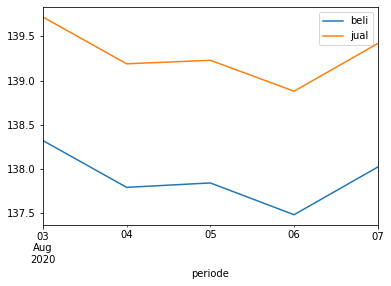

In [17]:
df.pivot_table(
 values=['jual','beli'],
    index='periode',
    
    aggfunc='max',
).plot(kind='line')

Dari data ini bisa di liat bahwa tanggal 3 agustus adalah yang paling tinggi untuk harga jual,maka saat terbaik untuk membeli mata uang yen adalah tanggal 6 agustus 2020. dan kemudian bila henda melakukan jual kembali (bid) pada tanggal 3 agustus 2020

Put your analysis and conclusion here. 

then put your flask dashboard link here too.